Coefficient (slope): 0.0023902890739833406
Intercept: -0.05407788339049481


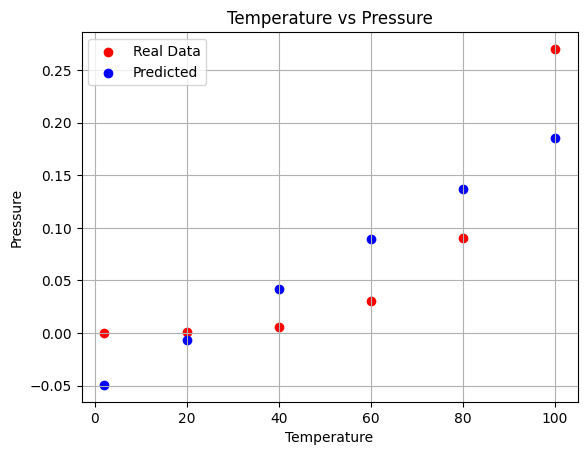

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

# Load dataset
df = pd.read_csv('testdata.csv')
temperature = df.iloc[:, 1:2].values  # Input (Temperature)
pressure = df.iloc[:, 2].values       # Output (Pressure)
# Initialize the Linear Regression model
linreg = LinearRegression()

# Fit the model
linreg.fit(temperature, pressure)

# Predict the output
predicted = linreg.predict(temperature)

# Display coefficients and intercept
print(f"Coefficient (slope): {linreg.coef_[0]}")
print(f"Intercept: {linreg.intercept_}")

# Plot the results
plt.scatter(temperature, pressure, color='red')
plt.scatter(temperature, predicted, color='blue')
plt.title('Temperature vs Pressure')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()


In [2]:
# Predict pressure for a new temperature value (e.g., 40 degrees)
new_temperature = np.array([[40]])
predicted_pressure = linreg.predict(new_temperature)
print(f"Predicted pressure for the given temperature {new_temperature[0][0]}: {predicted_pressure[0]}")

# Verify using the coefficients and intercept
predicted_pressure_compute = linreg.coef_[0] * new_temperature + linreg.intercept_
print(f"Predicted pressure computed using coefficient and intercept: {predicted_pressure_compute[0][0]}")


Predicted pressure for the given temperature 40: 0.04153367956883881
Predicted pressure computed using coefficient and intercept: 0.04153367956883881


In [3]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(pressure, predicted)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Relative Mean Squared Error (RelMSE)
rel_mse = mse / np.var(pressure)
print(f"Relative Mean Squared Error (RelMSE): {rel_mse}")

# Cross-validation using K-folds (using 5-folds as an example)
cv_scores = cross_val_score(linreg, temperature, pressure, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores: {-cv_scores}")


Mean Squared Error (MSE): 0.0027909386274701953
Root Mean Squared Error (RMSE): 0.05282933491413833
Relative Mean Squared Error (RelMSE): 0.3010918688691654
Cross-validation MSE scores: [0.02485311 0.00188868 0.00524186 0.00448507 0.0326406 ]


## Observation:

### Activity 1:  Coefficients and Intercept:
- **Coefficient (Slope)** represents how much the pressure increases for each unit increase in temperature. A value of `0.00239` means pressure increases by 0.00239 units for each degree increase in temperature.
- **Intercept** represents the pressure value when the temperature is 0 degrees. The intercept value of `-0.054` is quite close to zero, indicating that at very low temperatures, the model predicts a near-zero pressure.

### Activity 3: Pressure Prediction for New Temperature:
- **Predicted Pressure**: For a temperature of `40°C`, the model predicts a pressure of approximately `0.04153`
- This verifies that the model is performing well with consistent results from the linear equation and the regression model.

### Activity 4: Evaluation Metrics:
- **MSE (Mean Squared Error)**: Measures the average squared difference between predicted and actual values. A lower value indicates a better fit. 0.0027
- **RMSE (Root Mean Squared Error)**: Square root of MSE, providing error values in the same unit as the output. It provides a more interpretable measure of error. 0.0528
- **RelMSE (Relative Mean Squared Error)**: Normalizes MSE with respect to the variance of the actual values. A lower value means the model explains a significant portion of the variance in the data. 0.3010
- **Cross-Validation (CV)**: Shows MSE across different splits of the data. It provides an indication of how stable the model is when tested on different data subsets. [0.024 0.001 0.005 0.004 0.032 ]




Intercept: 36.459488385089955


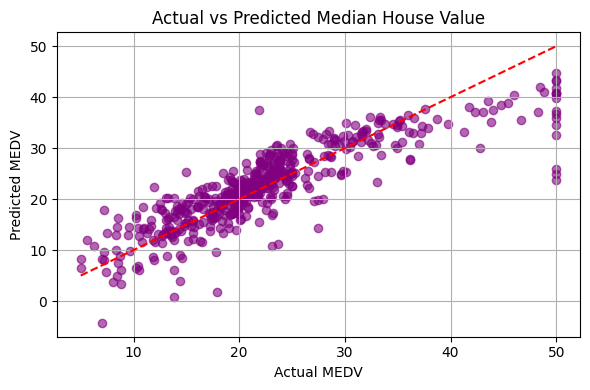

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset from CDN (GitHub raw link)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Features and Target
X = df.drop(columns=['medv'])  # 'medv' is the target (Median house value)
y = df['medv']

# Train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Display results
print("Intercept:", model.intercept_)
# Compact plot
plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred, alpha=0.6, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Median House Value')
plt.grid(True)
plt.tight_layout()
plt.show()

